In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [11]:
apple_stock=yf.download("AAPL",start='2022-01-01',end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [12]:
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449295,86709100


In [13]:
apple_stock['Daily_Return']=apple_stock['Adj Close'].pct_change()
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449295,86709100,0.000988


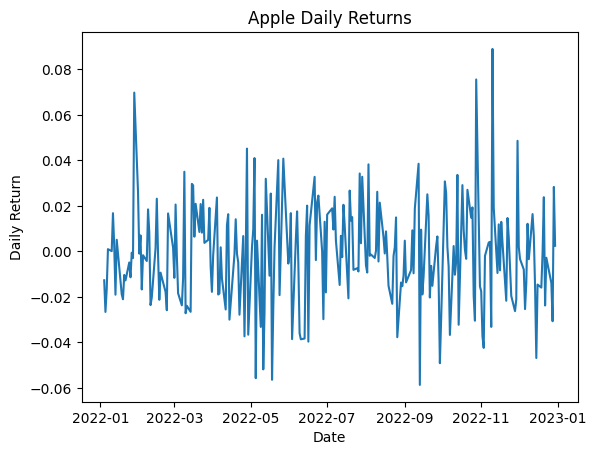

In [15]:
plt.plot(apple_stock['Daily_Return'])
plt.title('Apple Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [16]:
apple_stock['50_MovingAverage']=apple_stock['Adj Close'].rolling(window=50).mean()

In [17]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MovingAverage
Date,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446969
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,-0.013878,143.285242
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685,142.963930
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700,0.028324,142.687072
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414400


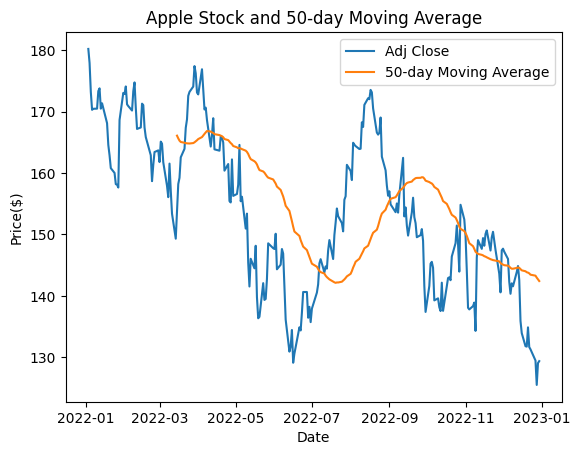

In [18]:
plt.plot(apple_stock['Adj Close'],label='Adj Close')
plt.plot(apple_stock['50_MovingAverage'],label='50-day Moving Average')
plt.title('Apple Stock and 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.legend()
plt.show()

In [21]:
volatility=apple_stock['Daily_Return'].std() #STandard Deviation
print(f'Volatility: {volatility}')

Volatility: 0.022471297604605634


In [23]:
risk_free_rate=0.01
annual_return=(apple_stock['Daily_Return'].mean()+1)**252 - 1
annual_volatility=apple_stock['Daily_Return'].std()*np.sqrt(252) #252 weekdays
sharpe_ratio= (annual_return-risk_free_rate)/(annual_volatility)
print(f'Sharpe Ratio: {sharpe_ratio}')

Sharpe Ratio: -0.6927822772229391


In [24]:
sp500= yf.download('^GSPC',start='2022-01-01',end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [25]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [27]:
sp500['Daily_Return_SP500']=sp500['Adj Close'].pct_change()
sp500

,Open,High,Low,Close,Adj Close,Volume,Daily_Return_SP500
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


In [29]:
joined_data=pd.concat([apple_stock['Daily_Return'], sp500['Daily_Return_SP500']], axis=1).dropna()

In [30]:
joined_data.head()

,Daily_Return,Daily_Return_SP500
Date,,
2022-01-04,-0.012692,-0.000630
2022-01-05,-0.026600,-0.019393
2022-01-06,-0.016693,-0.000964
2022-01-07,0.000988,-0.004050
2022-01-10,0.000116,-0.001441


In [31]:
beta=joined_data.cov().iloc[0,1] / joined_data['Daily_Return_SP500'].var()

In [33]:
print(f'Beta:  {beta}')

Beta:  1.3057989030992174
